# Dimensionality Reduction by Extracting Principal Components

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('wine.csv')
df.shape

(178, 14)

In [3]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = df.iloc[:,1:]

In [5]:
y = df['Wine']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

In [8]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_test_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.explained_variance_ratio_

array([0.40627457, 0.2388514 ])

In [12]:
print(np.round(pca.explained_variance_ratio_,3))

[0.406 0.239]


In [13]:
pd.DataFrame(np.round(pca.components_,3),columns=X.columns).T

,0,1
Alcohol,0.254,0.402
Malic.acid,-0.136,0.344
Ash,0.104,0.241
Acl,-0.179,0.091
Mg,0.169,0.336
Phenols,0.392,-0.126
Flavanoids,0.419,-0.156
Nonflavanoid.phenols,-0.271,-0.061
Proanth,0.298,-0.142
Color.int,0.090,0.484


In [14]:
pca = PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.fit_transform(X_train_sc)

array([[-1.16602698, -3.61532732,  1.15128454, ..., -0.1121504 ,
         0.07147567, -0.75559169],
       [-3.86261156, -0.48217746,  1.72758428, ...,  0.50457041,
        -0.18288356, -0.122403  ],
       [ 2.28353786,  1.27503318, -0.13167658, ...,  0.48017987,
        -0.45893296,  0.41585049],
       ...,
       [ 4.22339048, -2.40345929, -1.13704654, ..., -0.12930554,
        -0.20588086, -0.04785505],
       [-1.80527275,  1.49091985, -0.08991142, ..., -0.50730299,
        -0.48437788,  0.46676777],
       [-0.07808699,  1.19327925,  1.04439979, ..., -0.24025144,
         0.05180158, -0.28153725]])

In [16]:
 print(np.round(pca.explained_variance_ratio_,3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

Text(0,0.5,'cumulative explained variance')

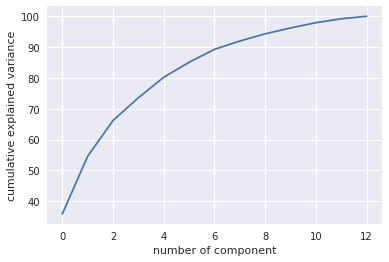

In [18]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of component')
plt.ylabel('cumulative explained variance')

In [19]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0,len(res))]

In [20]:
df1= pd.DataFrame(res , columns=df.columns[1:],index=index_name)[0:4]
df1.T.sort_values(by='PCA_0')

,PCA_0,PCA_1,PCA_2,PCA_3
Malic.acid,-3.615327,-0.482177,1.275033,-2.496962
Alcohol,-1.166027,-3.862612,2.283538,-1.678507
Proline,-0.755592,-0.122403,0.415850,-0.791136
Proanth,-0.639966,-0.005981,-0.481336,-0.121445
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927
Hue,-0.112150,0.504570,0.480180,-0.319599
OD,0.071476,-0.182884,-0.458933,0.045823
Mg,0.221634,-0.226540,0.215798,-0.003420
Color.int,0.262397,-0.453600,-0.777822,-0.123055
Nonflavanoid.phenols,0.918085,-0.113136,-0.678263,0.150849
